In [3]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_colormapped.html")

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
counts = [5, 3, 4, 2, 4, 6]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

p = figure(x_range=fruits, plot_height=350, toolbar_location=None, title="Fruit Counts")
p.vbar(x='fruits', top='counts', width=0.9, source=source, legend="fruits",
       line_color='white', fill_color=factor_cmap('fruits', palette=Spectral6, factors=fruits))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

In [9]:
import bokeh
bokeh.sampledata.download()

Creating /Users/deepak/.bokeh directory
Creating /Users/deepak/.bokeh/data directory
Using data directory: /Users/deepak/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downl

In [10]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

Text(value='', description='Domain to ping')

<IPython.core.display.Javascript object>


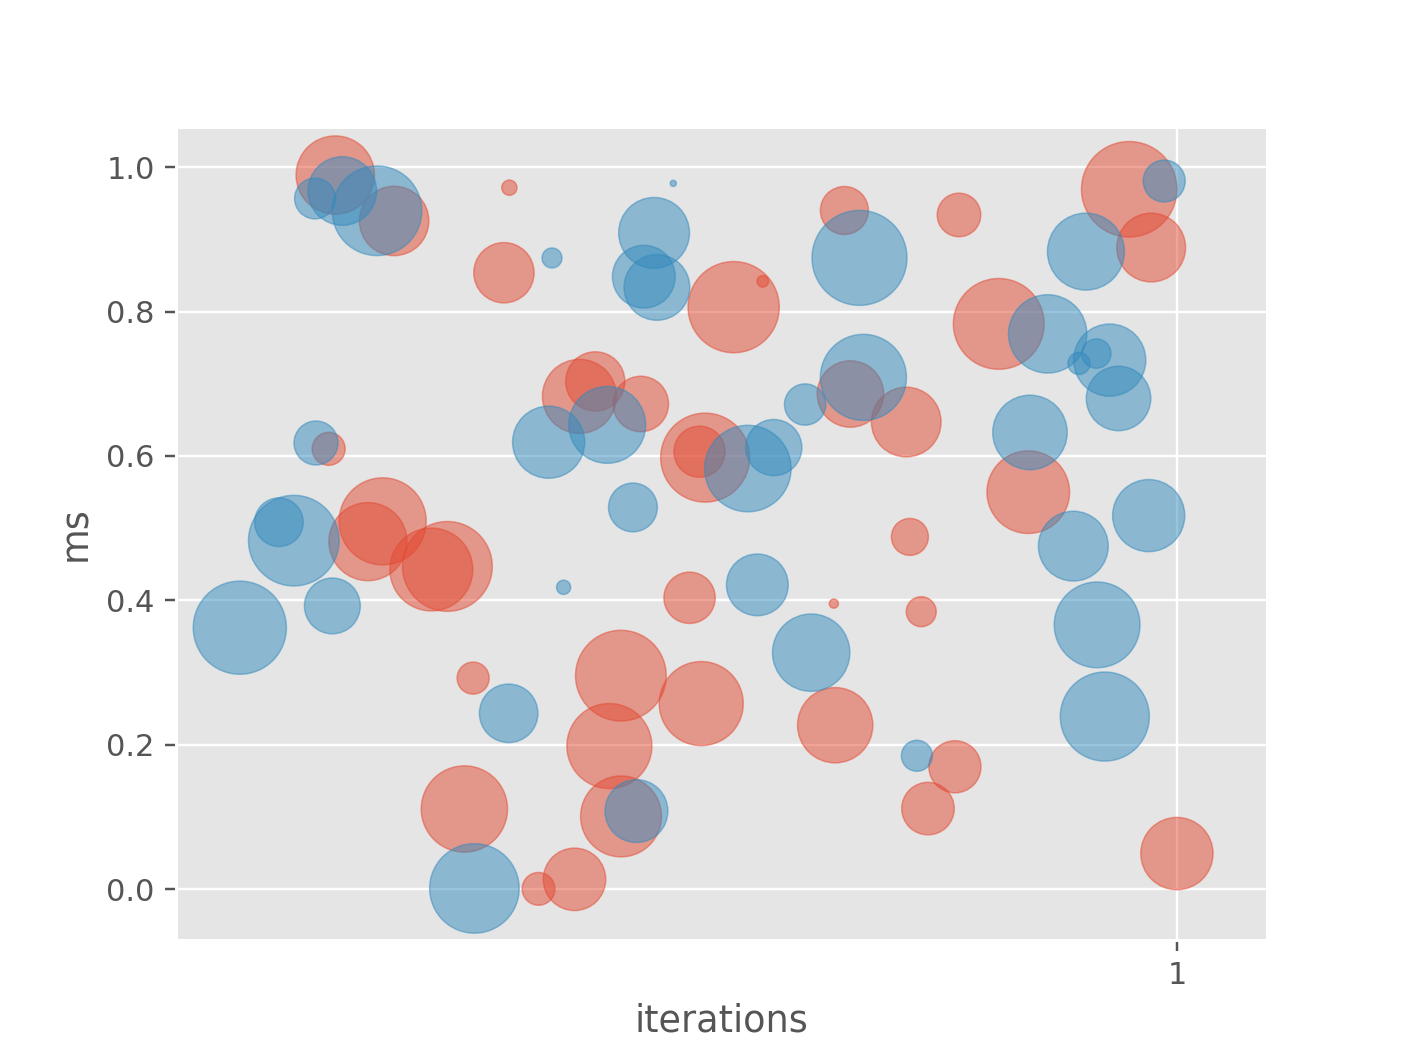

HBox()

AttributeError: 'list' object has no attribute 'astype'

In [18]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print ("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()

In [19]:

%%js
$(".repository-content, .container").css("width", "90%");
$("body, #outer-dashboard, .navbar-default").css("background-color", "honeydew");
$(".navbar-default").css("background-color", "lightblue");

<IPython.core.display.Javascript object>

In [20]:
%%html
<img src="//localhost:3010/files/img/pydata.png">

In [21]:
%%js
Jupyter.notebook.kernel.comm_manager.register_target(
    'pydata_comm_channel', 
    function (comm, msg) {
        comm.send({url: window.location.href});
        console.log('Sending url');
    });

<IPython.core.display.Javascript object>

In [22]:
import datetime
from math import pi
import numpy as np

import zmq
from zmq.eventloop.zmqstream import ZMQStream

from ipywidgets import interact, widgets
from IPython.display import display
from ipykernel.comm import Comm
from urllib.parse import urlparse, parse_qs

from bokeh.io import push_notebook
from bokeh.models import ColumnDataSource
from bokeh.models import DatetimeTickFormatter, HoverTool, DataRange1d
from bokeh.plotting import figure, show, output_notebook

In [23]:
output_notebook(hide_banner=True);


In [24]:

topic_widget = widgets.Text(description='Ticker:', placeholder='E.g. USDJPY=X')
display(topic_widget)

Text(value='', description='Ticker:', placeholder='E.g. USDJPY=X')

In [26]:
def handler(*args):
    plot.set_topic(topic_widget.value)

topic_widget.on_submit(handler)

In [27]:
class LivePlot(object):
    PORT = 5556

    def __init__(self, topic=None):
        self.topic = topic or ''
        # See https://github.com/bokeh/bokeh/issues/6108
        self.source = ColumnDataSource(data={'x': [datetime.datetime.now()], 'y': [0]})
        self.plot = None

    def subscribe(self):
        ctx = zmq.Context()
        sock = ctx.socket(zmq.SUB)
        sock.connect('tcp://localhost:{}'.format(self.PORT))
        sock.setsockopt_string(zmq.SUBSCRIBE, '')
        stream = ZMQStream(sock)
        stream.on_recv(self.callback)

    def set_topic(self, topic):
        self.topic = topic.upper()
        self.source.data = dict(x=[], y=[])

    def make_plot(self):
        self.plot = figure(
            plot_height=400,
            plot_width=800,
            background_fill_alpha=0,
            border_fill_alpha=0,
            x_axis_type='datetime',
            logo=None,
            tools='pan,wheel_zoom,box_zoom,reset,resize,crosshair,hover'
        )
        self.plot.circle('x', 'y', source=self.source, color='steelblue', size=7)
        self.plot.line('x', 'y', source=self.source, color='crimson', alpha=0.5, line_width=2)
        self.plot.xaxis.major_label_orientation = pi / 4
        hover = self.plot.select(dict(type=HoverTool))
        hover.tooltips = [
            ("Value", "$y"),
        ]
        self.handle = show(self.plot, notebook_handle=True)

    def callback(self, msg):
        msg_text = msg[0].decode('utf-8').rpartition(' ')
        self.debug_msg = msg
        if self.topic == msg_text[0]:
            payload = float(msg_text[-1])
            x = datetime.datetime.now()
            self.source.data['x'].append(x)
            self.source.data['y'].append(payload)
            self.source.data['x'] = self.source.data['x'][-20:]
            self.source.data['y'] = self.source.data['y'][-20:]
            push_notebook(handle=self.handle)

In [28]:
plot = LivePlot()
plot.make_plot()
plot.subscribe()

/Users/deepak/anaconda/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: ResizeTool is removed in Bokeh 0.12.7, adding it is a no-op. In the future, accessing ResizeTool will be an error
  warn(message)


In [30]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = np.random.rand(40)
y = np.random.rand(40)
z = np.random.rand(40)
 
# use the scatter function
plt.scatter(x, y, s=z*1000, alpha=0.5)
plt.show()


In [31]:
import json, requests
url = "http://www.omdbapi.com/?t=scream"
response = requests.get(url)
python_dictionary_values = json.loads(response.text)

In [32]:
python_dictionary_values

{'Error': 'No API key provided.', 'Response': 'False'}

In [34]:
import json, requests

url = 'http://example.com/endpoint/'

parameters = dict(
    field1='some value',
    field2='another value',
    field3='yet another value',
)

resp = requests.get(url=url, params=parameters)
data = json.loads(resp.text)
print (data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [35]:
from imdbpie import Imdb
imdb = Imdb()
imdb = Imdb(anonymize=True) # to proxy requests

In [36]:
imdb.search_for_title("The Dark Knight")

[{'imdb_id': 'tt0468569', 'title': 'The Dark Knight', 'year': '2008'},
 {'imdb_id': 'tt1345836', 'title': 'The Dark Knight Rises', 'year': '2012'},
 {'imdb_id': 'tt2313197',
  'title': 'Batman: The Dark Knight Returns, Part 1',
  'year': '2012'},
 {'imdb_id': 'tt2166834',
  'title': 'Batman: The Dark Knight Returns, Part 2',
  'year': '2013'},
 {'imdb_id': 'tt1213819', 'title': 'The Dark Knight', 'year': '1995'},
 {'imdb_id': 'tt1774602', 'title': 'The Dark Knight', 'year': '2008'},
 {'imdb_id': 'tt2258647', 'title': 'The Dark Knight', 'year': '2011'},
 {'imdb_id': 'tt2098632', 'title': 'Batman: The Dark Knight', 'year': '2008'},
 {'imdb_id': 'tt2257218', 'title': 'The Dark Knight Retires', 'year': '2013'},
 {'imdb_id': 'tt1265589', 'title': 'Batman Unmasked', 'year': '2008'},
 {'imdb_id': 'tt0486410',
  'title': 'Legends of the Dark Knight: The History of Batman',
  'year': '2005'},
 {'imdb_id': 'tt0486908',
  'title': 'Shadows of the Bat: The Cinematic Saga of the Dark Knight - Batma

In [38]:
imdb.top_250()[0]

{'can_rate': True,
 'image': {'height': 1388,
  'url': 'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_.jpg',
  'width': 933},
 'num_votes': 1865381,
 'rating': 9.3,
 'tconst': 'tt0111161',
 'title': 'The Shawshank Redemption',
 'type': 'feature',
 'year': '1994'}

In [1]:
import matplotlib.pyplot as plt, mpld3
plt.plot([3,1,4,1,5], 'ks-', mec='w', mew=5, ms=20)
mpld3.show()


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [16/Oct/2017 02:19:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2017 02:19:43] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2017 02:19:43] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

mpld3.show()


Note: if you're in the IPython notebook, mpld3.show() is not the best command
      to use. Consider using mpld3.display(), or mpld3.enable_notebook().
      See more information at http://mpld3.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


/Users/deepak/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
127.0.0.1 - - [16/Oct/2017 02:21:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2017 02:21:09] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [16/Oct/2017 02:21:09] "GET /mpld3.js HTTP/1.1" 200 -



stopping Server...
